BioPandas

Author: Sebastian Raschka <mail@sebastianraschka.com>  
License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [1]:
%load_ext watermark
%watermark -d -u -v -p pandas,biopandas

Last updated: 11/23/2015 

CPython 3.5.0
IPython 4.0.0

pandas 0.16.2
biopandas 0.1.0


# PandasPDB

# Examples

## Loading PDB Files

PDB files can be directly fetched from The Protein Data Bank at http://www.rcsb.org via its unique 4-letter code:

In [4]:
from biopandas.pdb import PandasPDB

# Initialize a new PandasPDB object
# and fetch the PDB file from rcsb.org
ppdb = PandasPDB().fetch_pdb('3eiy')

Alternatively, we can load PDB files from local directories as regular PDB files or gzipped PDB files:

In [3]:
ppdb.read_pdb('./data/3eiy.pdb')
ppdb.read_pdb('./data/3eiy.pdb.gz')

After the file was succesfully loaded, we have access to the following attributes:

In [4]:
print('PDB Code: %s' % ppdb.code)
print('PDB Header Line: %s' % ppdb.header)
print('\nRaw PDB file contents:\n%s\n...' % ppdb.pdb_text[:1000])

PDB Code: 3eiy
PDB Header Line:     HYDROLASE                               17-SEP-08   3EIY

Raw PDB file contents:
HEADER    HYDROLASE                               17-SEP-08   3EIY              
TITLE     CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHATASE FROM BURKHOLDERIA      
TITLE    2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE                                
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: INORGANIC PYROPHOSPHATASE;                                 
COMPND   3 CHAIN: A;                                                            
COMPND   4 EC: 3.6.1.1;                                                         
COMPND   5 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: BURKHOLDERIA PSEUDOMALLEI 1710B;                
SOURCE   3 ORGANISM_TAXID: 320372;                                       

In [7]:
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,resi_name,blank_2,chain_id,resi_number,resi_insert_code,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1,52.69,,,C,NaN,613


In the example above, we accessed the DataFrame of the PDB ATOM Coordinate section. More information about the different DataFrames in the following sections.

## PDB files via pandas DataFrames

After we loaded the PDB file into `PandasPDB` object, we can access it through pandas DataFrames:

In [6]:
from biopandas import PandasPDB
ppdb = PandasPDB()
ppdb.read_pdb('./data/3eiy.pdb.gz')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,resi_name,blank_2,chain_id,resi_number,resi_insert_code,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1,52.69,,,C,NaN,613


The pandas DataFrames for different PDB record sections are available via the `df` dictionary:

In [10]:
print('List of available DataFrames:\n %s' % list(ppdb.df.keys()))

List of available DataFrames:
 ['HETATM', 'OTHERS', 'ANISOU', 'ATOM']


For example, we can return the first 5 lines of HETATM entries via

In [12]:
ppdb.df['HETATM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,resi_name,blank_2,chain_id,resi_number,resi_insert_code,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,1332,,K,,K,,A,176,,...,24.990,43.276,0.005,0.5,24.45,,,K,NaN,1940
1,HETATM,1333,,NA,,NA,,A,177,,...,1.633,34.181,11.897,1.0,26.73,,,NA,NaN,1941
2,HETATM,1334,,NA,,NA,,A,178,,...,6.489,35.143,8.444,1.0,30.89,,,NA,NaN,1942
3,HETATM,1335,,P1,,POP,,A,179,,...,1.233,37.542,11.212,1.0,32.68,,,P,NaN,1943
4,HETATM,1336,,O1,,POP,,A,179,,...,1.910,38.831,11.612,1.0,32.62,,,O,NaN,1944


In [15]:
ppdb.df['ATOM'].dtypes

record_name          object
atom_number           int64
blank_1              object
atom_name            object
alt_loc              object
resi_name            object
blank_2              object
chain_id             object
resi_number           int64
resi_insert_code     object
blank_3              object
x_coord             float64
y_coord             float64
z_coord             float64
occupancy           float64
b_factor            float64
blank_4              object
segment_id           object
element_symbol       object
charge              float64
line_idx              int64
dtype: object

In [13]:
ppdb.df['OTHERS'].head()

,record_name,entry,line_idx
0,HEADER,HYDROLASE 17...,0
1,TITLE,CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHA...,1
2,TITLE,2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE,2
3,COMPND,MOL_ID: 1;,3
4,COMPND,2 MOLECULE: INORGANIC PYROPHOSPHATASE;,4


In [1092]:
mainchain = ppdb.df['ATOM'][(ppdb.df['ATOM']['atom_name'] == 'C') | 
                            (ppdb.df['ATOM']['atom_name'] == 'O') | 
                            (ppdb.df['ATOM']['atom_name'] == 'N') | 
                            (ppdb.df['ATOM']['atom_name'] == 'CA')]

bfact_mc_avg = mainchain['b_factor'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 28.83


## Interacting with PDB file contents

In [ ]:
from biopandas import PandasPDB
ppdb = PandasPDB()
ppdb.read_pdb('./data/3eiy.pdb.gz')


In [17]:
ppdb.df['ATOM'][ppdb.df['ATOM']['resi_name'] == 'SER'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,resi_name,blank_2,chain_id,resi_number,resi_insert_code,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1,52.69,,,C,NaN,613


In [21]:

{'main chain', 'hydrogen', 'no hydrogen', 'c-alpha'}

{'c-alpha', 'hydrogen', 'main chain', 'no hydrogen'}

In [24]:
ppdb.get('main chain').head()

,record_name,atom_number,blank_1,atom_name,alt_loc,resi_name,blank_2,chain_id,resi_number,resi_insert_code,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1,52.45,,,O,NaN,612
6,ATOM,7,,N,,PHE,,A,3,,...,3.563,52.626,0.674,1,50.61,,,N,NaN,615


In [25]:
bfact_ca_avg =  ppdb.df['ATOM'].loc[ppdb.df['ATOM']['atom_name'] == 'C', 'b_factor'].mean()

print('Average B-Factor [C-Alpha]: %.2f' % bfact_ca_avg)

Average B-Factor [C-Alpha]: 28.89


## Plotting

In [1095]:
from biopandas import PandasPDB
ppdb = PandasPDB()
ppdb.read_pdb('./data/3eiy.pdb.gz')

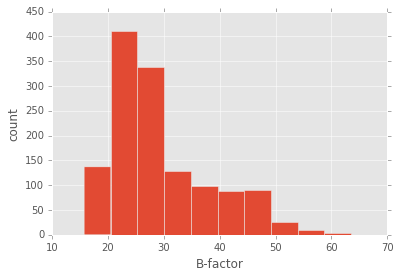

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

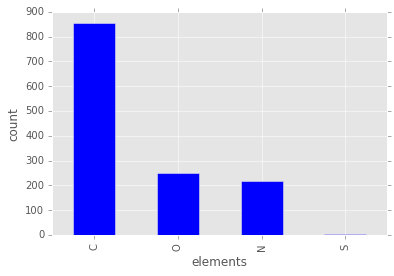

In [28]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## Root Mean Square Deviation

In [36]:
p_1 = PandasPDB()
p_1.read_pdb('./data/lig_conf_1.pdb')
p_2 = PandasPDB()
p_2.read_pdb('./data/lig_conf_2.pdb')
r = PandasPDB.rmsd(p_1.df['HETATM'], p_2.df['HETATM'], s='no hydrogen')
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


# API

In [37]:
help(PandasPDB())

Help on PandasPDB in module biopandas.pandas_pdb object:

class PandasPDB(builtins.object)
 |  Object for working with Protein Databank structure files.
 |  
 |  Attributes
 |  ----------
 |  df : dict
 |      Dictionary storing pandas DataFrames for PDB record sections.
 |      The dictionary keys are {'ATOM', 'HETATM', 'ANISOU', 'OTHERS'}
 |      where 'OTHERS' contains all entries that are not parsed as
 |      'ATOM', 'HETATM', or 'ANISOU'
 |  
 |  pdb_text : str
 |      PDB file contents in raw text format
 |  
 |  header : str
 |      PDB file description
 |  
 |  code : str
 |      PDB code
 |  
 |  Examples
 |  --------
 |  >>> ppdb = PandasPDB()
 |  >>> ppdb.fetch_pdb('3eiy')
 |  >>> ppdb.df['ATOM'].head()
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fetch_pdb(self, pdb_code)
 |      Fetches PDB file contents from the Protein Databank at rcsb.org.
 |      
 |      Parameters
 |      -----


  <body role="document">

    <div class="document">
      <div class="documentwrapper">
        <div class="bodywrapper">
          <div class="body" role="main">

  <div class="section" id="module-biopandas.pandas_pdb">

<dl class="class">
<dt id="biopandas.pandas_pdb.PandasPDB">
<em class="property">class </em><code class="descclassname">biopandas.pandas_pdb.</code><code class="descname">PandasPDB</code><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB" title="Permalink to this definition">¶</a></dt>
<dd><p>Bases: <code class="xref py py-class docutils literal"><span class="pre">object</span></code></p>
<p>Object for working with Protein Databank structure files.</p>
<dl class="docutils">
<dt>df <span class="classifier-delimiter">:</span> <span class="classifier">dict</span></dt>
<dd>Dictionary storing pandas DataFrames for PDB record sections.
The dictionary keys are {&#8216;ATOM&#8217;, &#8216;HETATM&#8217;, &#8216;ANISOU&#8217;, &#8216;OTHERS&#8217;}
where &#8216;OTHERS&#8217; contains all entries that are not parsed as
&#8216;ATOM&#8217;, &#8216;HETATM&#8217;, or &#8216;ANISOU&#8217;</dd>
<dt>pdb_text <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>PDB file contents in raw text format</dd>
<dt>header <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>PDB file description</dd>
<dt>code <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>PDB code</dd>
</dl>
<div class="highlight-python"><div class="highlight"><pre><span class="gp">&gt;&gt;&gt; </span><span class="n">ppdb</span> <span class="o">=</span> <span class="n">PandasPDB</span><span class="p">()</span>
<span class="gp">&gt;&gt;&gt; </span><span class="n">ppdb</span><span class="o">.</span><span class="n">fetch_pdb</span><span class="p">(</span><span class="s">&#39;3eiy&#39;</span><span class="p">)</span>
<span class="gp">&gt;&gt;&gt; </span><span class="n">ppdb</span><span class="o">.</span><span class="n">df</span><span class="p">[</span><span class="s">&#39;ATOM&#39;</span><span class="p">]</span><span class="o">.</span><span class="n">head</span><span class="p">()</span>
</pre></div>
</div>
<dl class="attribute">
<dt id="biopandas.pandas_pdb.PandasPDB.df">
<code class="descname">df</code><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.df" title="Permalink to this definition">¶</a></dt>
<dd><p>Acccess dictionary of pandas DataFrames for PDB record sections.</p>
</dd></dl>

<dl class="method">
<dt id="biopandas.pandas_pdb.PandasPDB.fetch_pdb">
<code class="descname">fetch_pdb</code><span class="sig-paren">(</span><em>pdb_code</em><span class="sig-paren">)</span><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB.fetch_pdb"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.fetch_pdb" title="Permalink to this definition">¶</a></dt>
<dd><p>Fetches PDB file contents from the Protein Databank at rcsb.org.</p>
<dl class="docutils">
<dt>pdb_code <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>A 4-letter PDB code, e.g., &#8220;3eiy&#8221;</dd>
</dl>
</dd></dl>

<dl class="method">
<dt id="biopandas.pandas_pdb.PandasPDB.get">
<code class="descname">get</code><span class="sig-paren">(</span><em>s</em>, <em>df=None</em><span class="sig-paren">)</span><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB.get"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.get" title="Permalink to this definition">¶</a></dt>
<dd><p>Filter PDB DataFrames by properties</p>
<dl class="docutils">
<dt>s <span class="classifier-delimiter">:</span> <span class="classifier">str {&#8216;main chain&#8217;, &#8216;hydrogen&#8217;, &#8216;no hydrogen&#8217;, &#8216;c-alpha&#8217;}</span></dt>
<dd>String to specify which entries to return</dd>
<dt>df <span class="classifier-delimiter">:</span> <span class="classifier">pandas.DataFrame (default</span> <span class="classifier-delimiter">:</span> <span class="classifier">None)</span></dt>
<dd>Optional DataFrame to perform the filter operation on.
If df=None, filters on self.df[&#8216;ATOM&#8217;]</dd>
</dl>
<dl class="docutils">
<dt>df <span class="classifier-delimiter">:</span> <span class="classifier">pandas.DataFrame</span></dt>
<dd>Returns a DataFrame view on the filtered entries.</dd>
</dl>
</dd></dl>

<dl class="method">
<dt id="biopandas.pandas_pdb.PandasPDB.read_pdb">
<code class="descname">read_pdb</code><span class="sig-paren">(</span><em>path</em><span class="sig-paren">)</span><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB.read_pdb"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.read_pdb" title="Permalink to this definition">¶</a></dt>
<dd><p>Read PDB files (unzipped or gzipped) from local drive</p>
<dl class="docutils">
<dt>path <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>Path to the PDB file in .pdb format or gzipped format (.pdb.gz)</dd>
</dl>
</dd></dl>

<dl class="staticmethod">
<dt id="biopandas.pandas_pdb.PandasPDB.rmsd">
<em class="property">static </em><code class="descname">rmsd</code><span class="sig-paren">(</span><em>df1</em>, <em>df2</em>, <em>s='no hydrogen'</em><span class="sig-paren">)</span><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB.rmsd"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.rmsd" title="Permalink to this definition">¶</a></dt>
<dd><p>Compute the Root Mean Square Deviation between molecules.</p>
<dl class="docutils">
<dt>df1 <span class="classifier-delimiter">:</span> <span class="classifier">pandas.DataFrame</span></dt>
<dd>DataFrame with HETATM, ATOM, and/or ANISOU entries</dd>
<dt>df2 <span class="classifier-delimiter">:</span> <span class="classifier">pandas.DataFrame</span></dt>
<dd>Second DataFrame for RMSD computation against df1. Must have the
same number of entries as df1</dd>
<dt>s <span class="classifier-delimiter">:</span> <span class="classifier">str {&#8216;main chain&#8217;, &#8216;hydrogen&#8217;, &#8216;no hydrogen&#8217;, &#8216;c-alpha&#8217;}</span></dt>
<dd>String to specify which entries to consider</dd>
</dl>
<dl class="docutils">
<dt>rmsd <span class="classifier-delimiter">:</span> <span class="classifier">float</span></dt>
<dd>Root Mean Square Deviation between df1 and df2</dd>
</dl>
</dd></dl>

<dl class="method">
<dt id="biopandas.pandas_pdb.PandasPDB.to_pdb">
<code class="descname">to_pdb</code><span class="sig-paren">(</span><em>path</em>, <em>records=None</em>, <em>gz=False</em>, <em>append_newline=True</em><span class="sig-paren">)</span><a class="reference internal" href="_modules/biopandas/pandas_pdb.html#PandasPDB.to_pdb"></a><a class="headerlink" href="#biopandas.pandas_pdb.PandasPDB.to_pdb" title="Permalink to this definition">¶</a></dt>
<dd><p>Write record DataFrames to a PDB file or gzipped PDB file.</p>
<dl class="docutils">
<dt>path <span class="classifier-delimiter">:</span> <span class="classifier">str</span></dt>
<dd>A valid output path for the pdb file</dd>
<dt>records <span class="classifier-delimiter">:</span> <span class="classifier">iterable (default: None)</span></dt>
<dd>A list of PDB record sections in
{&#8216;ATOM&#8217;, &#8216;HETATM&#8217;, &#8216;ANISOU&#8217;, &#8216;OTHERS&#8217;} that are to be written.
Writes all lines to PDB if records=None</dd>
<dt>gz <span class="classifier-delimiter">:</span> <span class="classifier">bool (default: False)</span></dt>
<dd>Writes a gzipped PDB file if True</dd>
<dt>append_newline <span class="classifier-delimiter">:</span> <span class="classifier">bool (default: True)</span></dt>
<dd>Appends a new line at the end of the PDB file if True</dd>
</dl>
</dd></dl>

</dd></dl>

</div>


          </div>
        </div>
      </div>





  </body>

